In [1]:
import keras

In [2]:
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()

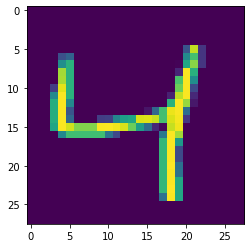

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [6]:
X_train.shape

(60000, 28, 28)

In [5]:
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test.reshape(10000,28,28,1)

In [6]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)
#why we are creating categorical values is because if we predicted a image as shirt the remaining all values are going to be 0

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [8]:
model=Sequential()
model.add(Conv2D(64,kernel_size=3,strides=(1,1),activation='relu',
                 kernel_initializer='he_uniform',
                 input_shape=(28,28,1)))
#kernel_size or filters both are same

In [9]:
model.add(Conv2D(32,kernel_size=2,strides=(1,1),
                 use_bias=True,
                 kernel_initializer='glorot_uniform',
                 activation='relu'))


In [10]:
model.add(Flatten())
#flatten is connection between convolution and dense layers.

In [11]:
model.add(Dense(10,activation='softmax'))

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3)

Epoch 1/3
1875/1875 [==============================] - 144s 77ms/step - loss: 1.4593 - accuracy: 0.9219 - val_loss: 0.1855 - val_accuracy: 0.9465
Epoch 2/3
1875/1875 [==============================] - 142s 76ms/step - loss: 0.1723 - accuracy: 0.9520 - val_loss: 0.1641 - val_accuracy: 0.9581
Epoch 3/3
1875/1875 [==============================] - 109s 58ms/step - loss: 0.1826 - accuracy: 0.9520 - val_loss: 0.2271 - val_accuracy: 0.9368


In [34]:
model.save_weights('cnn.h5')